In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append('./Components')

from BETCalculator import BETCalculator
from AlphaSCalculator import AlphaSCalculator
from TCurveCalculator import TCurveCalculator
from DRCalculator import DRCalculator
from BJHcalculator import BJHcalculator

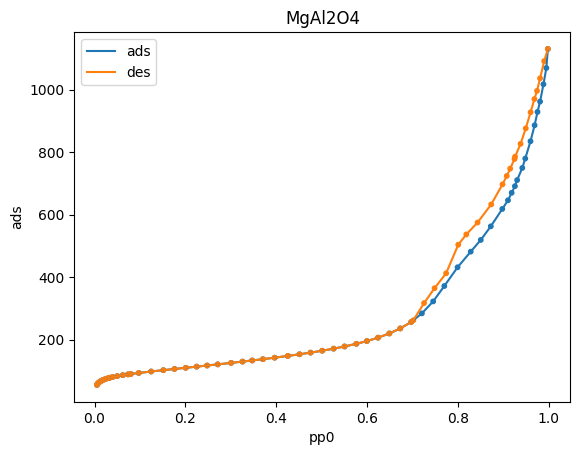

In [2]:
# Read sample data
filename_sample = r'data/MgAl2O4.csv'
csv_file = pd.read_csv(filename_sample)
max_uptake_idx = csv_file['uptake'].tolist().index(max(csv_file['uptake']))

ads_pp0 = csv_file['pp0'][:max_uptake_idx+1]
des_pp0 = csv_file['pp0'][max_uptake_idx:]
ads_uptake = csv_file['uptake'][:max_uptake_idx+1]
des_uptake = csv_file['uptake'][max_uptake_idx:]

# Plot raw sample data
plt.scatter(ads_pp0, ads_uptake, s=np.ones(len(ads_pp0))*10)
plt.scatter(des_pp0, des_uptake, s=np.ones(len(ads_pp0))*10)
plt.plot(ads_pp0, ads_uptake, label='ads')
plt.plot(des_pp0, des_uptake, label='des')
plt.title('MgAl2O4')
plt.xlabel('pp0')
plt.ylabel('ads')
plt.legend()
plt.show()

Образец $MgAl_{2}O_{4}$.

Приготовлен по аэрогельной методике.

Изотерма IV типа: мезопористый материал.

Методы: BET, t-curve, alpha-s, DR.

Удельная поверхность 393.57 кв.м/г
Константа С 130.03


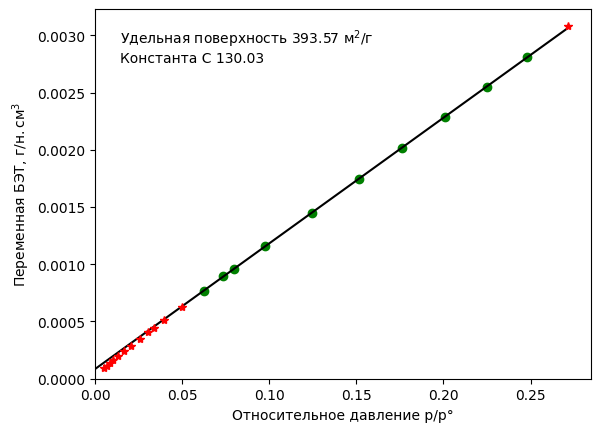

In [3]:
# BET
bet_calculator = BETCalculator(ads_pp0, ads_uptake)
bet_calculator.run()

# Plot 1. Linearization. green: points used for calculation; line: linear trend

alpha s selection


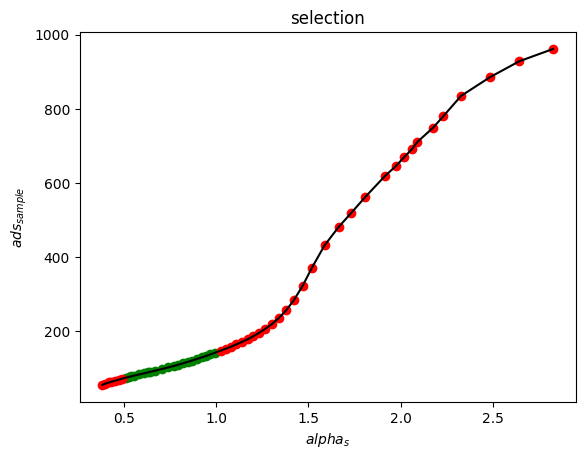

alpha s lineariztion


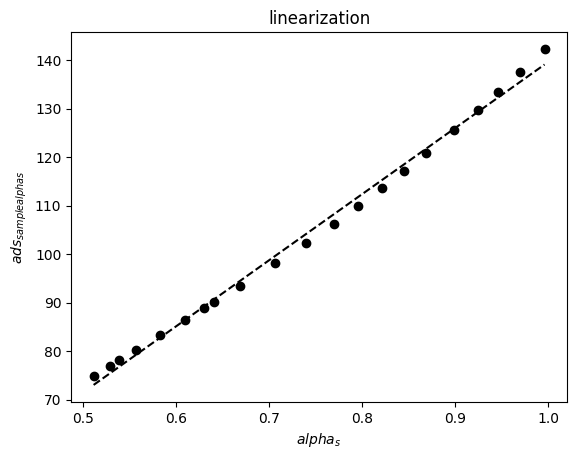

BET calculation for reference
Удельная поверхность 2.88 кв.м/г
Константа С 96.44


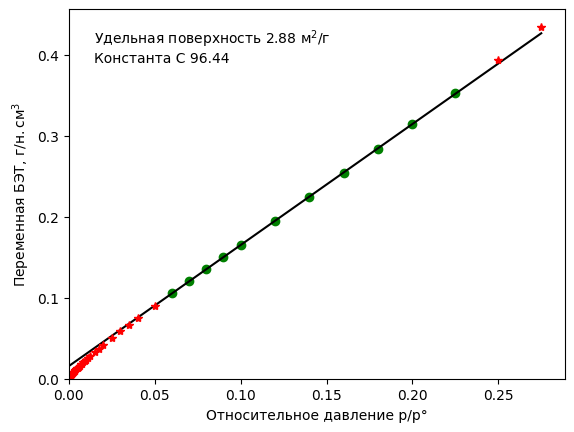

BET calculation for sample
Удельная поверхность 393.57 кв.м/г
Константа С 130.03


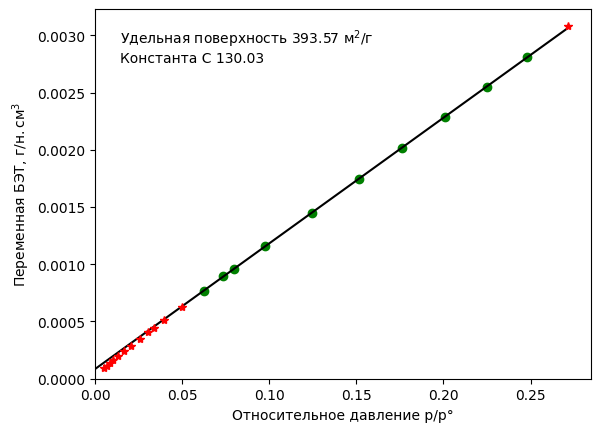

as     393.57 m^2/g
as_mic  0.41 m^2/g
v_mic 0.00 cm^3/g


In [4]:
# read reference data
filename_ref = r'data/LiChrospher_Si-1000 (Isotherm).csv'
data_ref = pd.read_csv(filename_ref)
ref_pp0 = data_ref["Relative Pressure"].to_numpy()
ref_uptake = data_ref["Volume @ STP"].to_numpy()

# AlphaS
as_calculator = AlphaSCalculator(ref_pp0, ref_uptake, ads_pp0, ads_uptake)
as_calculator.run()

# Plot 1. Selection of alpha s points. green: points used for calculation
# Plot 2. Linearization of alpha s points
# Plot 3. BET surface calculation for sample
# Plot 4. BET surface calculation for reference

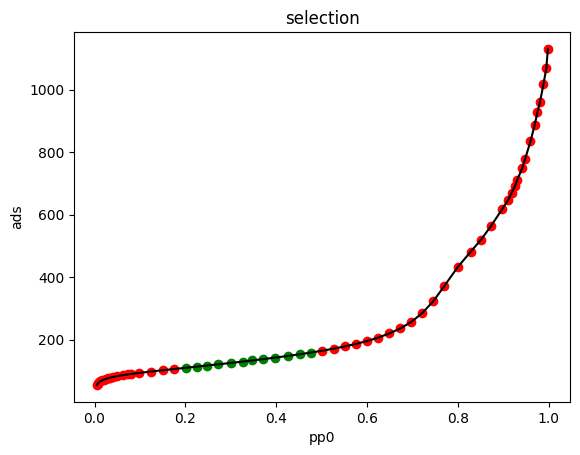

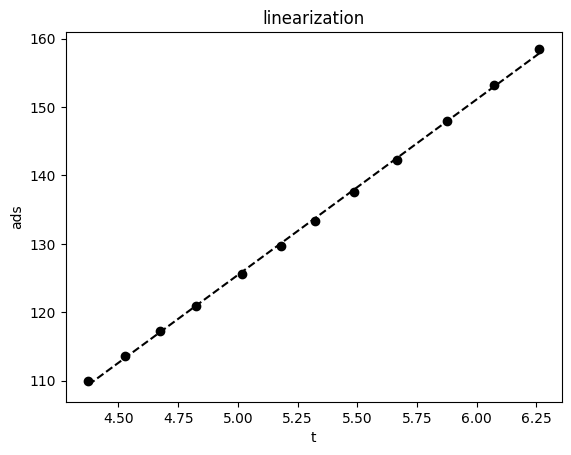

as     393.57 m^2/g
as_ext 397.00 m^2/g
as_mic  -3.42 m^2/g


In [5]:
# t curve method
tc_calculator = TCurveCalculator(ads_pp0, ads_uptake)
tc_calculator.run()

# Plot 1. Selection. green: points used for calculation; line: linear trend
# Plot 2. Linearization of alpha s points

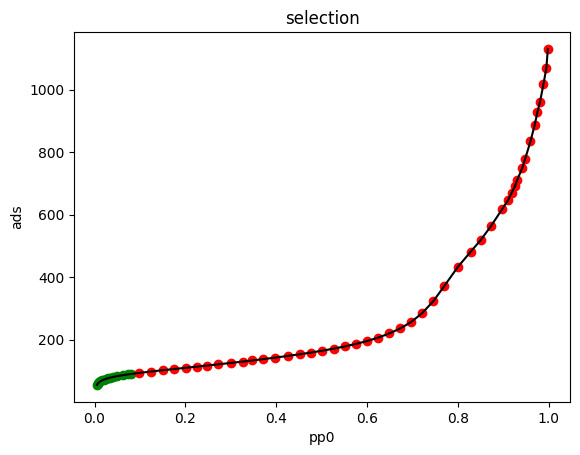

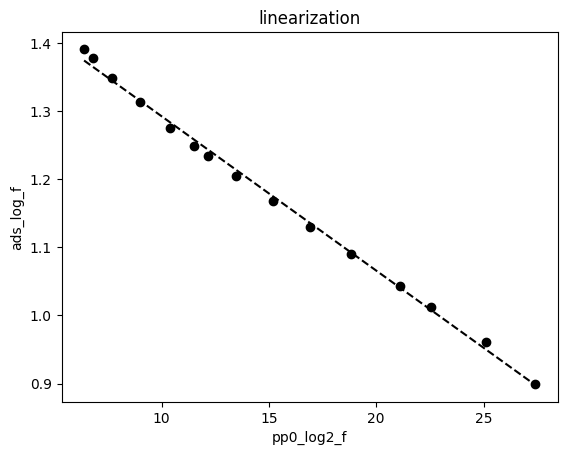

as     19.88 m^2/g
V_mic  0.01 m^2/g


In [6]:
# DR method
dr_calculator = DRCalculator(ads_pp0, ads_uptake)
dr_calculator.run()

# Plot 1: Selection. green: points used for calculation
# Plot 2: Linerization

In [7]:
print(f'BET surface {bet_calculator.getSSA():.2f} m^2/g\n')
print(f'Micropore surface. \n\
Alpha s method: {round(as_calculator.getAsMic(), 3)} m^2/g \n\
t-curve method: {round(tc_calculator.getAsMic(), 3)} m^2/g \n')

print(f'Micropore volume.\n\
Alpha s method: {round(as_calculator.getVMic(), 5)} cm^3/g \n\
t-curve method: {round(tc_calculator.getVMic(), 5)} cm^3/g \n\
DR method: {round(tc_calculator.getVMic(), 5)} cm^3/g\n')

print(f'Average hydraulic diameter.\n\
Alpha s method: {round(4e3 * as_calculator.getVMic() / as_calculator.getAsMic(), 5)} nm\n\
t-curve method: {round(4e3 * tc_calculator.getVMic() / tc_calculator.getAsMic(), 5)} nm')

BET surface 393.57 m^2/g

Micropore surface. 
Alpha s method: 0.405 m^2/g 
t-curve method: 3.423 m^2/g 

Micropore volume.
Alpha s method: 0.005 cm^3/g 
t-curve method: 0.00443 cm^3/g 
DR method: 0.00443 cm^3/g

Average hydraulic diameter.
Alpha s method: 49.31784 nm
t-curve method: 5.17238 nm
